In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the metadata

In [144]:
metadata = pd.read_excel('./data/metadata.xlsx', skiprows=1)
metadata.head()

,Case Number,CaseID,HPV,Adequacy,Reason,Squamocolumnar junction visibility,Transformation zone,Original squamous epithelium,Columnar epithelium,Metaplastic squamous epithelium,...,Additional miscellaneous finding,Aceto uptake,Margins,Vessels,Lesion size,Iodine uptake,SwedeFinal,Provisional diagnosis,Management,Histopathology
0,1,AAAW,Positive,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Nabothian cysts,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Faintly or patchy yellow,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
1,2,AADE,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy present,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
2,3,AADG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,Absent,< 5 mm,Brown,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,4,AAEG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,NaN,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,5,AAER,Positive,Adequate,NaN,Completely visible,Type 2,Mature,NaN,NaN,...,NaN,Nil or transparent,Nil or diffuse,Absent,">15 mm, 3-4 quadrants, or endocervically undef...",Faintly or patchy yellow,4,Type 2 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done


# 2. Load the metadata

In [145]:
selected_columns = ['Case Number', 'CaseID', 'Aceto uptake', 'Margins', 'Vessels', 'Lesion size', 'Iodine uptake', 'SwedeFinal']
selected_metadata = metadata[selected_columns]
selected_metadata.head()

,Case Number,CaseID,Aceto uptake,Margins,Vessels,Lesion size,Iodine uptake,SwedeFinal
0,1,AAAW,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Faintly or patchy yellow,1
1,2,AADE,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0
2,3,AADG,Nil or transparent,Nil or diffuse,Absent,< 5 mm,Brown,1
3,4,AAEG,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0
4,5,AAER,Nil or transparent,Nil or diffuse,Absent,">15 mm, 3-4 quadrants, or endocervically undef...",Faintly or patchy yellow,4


# 3. Exploring metadata

In [146]:
selected_metadata.isnull().sum()

Case Number      0
CaseID           0
Aceto uptake     2
Margins          2
Vessels          2
Lesion size      2
Iodine uptake    6
SwedeFinal       0
dtype: int64

In [147]:
# Filling missing categorical values.
categorical_columns = ['Aceto uptake', 'Margins', 'Vessels', 'Lesion size', 'Iodine uptake']
for col in categorical_columns:
    mode_value = selected_metadata[col].mode()[0]
    selected_metadata.fillna({ col: mode_value }, inplace=True)

selected_metadata.isnull().sum()

Case Number      0
CaseID           0
Aceto uptake     0
Margins          0
Vessels          0
Lesion size      0
Iodine uptake    0
SwedeFinal       0
dtype: int64

In [148]:
# Define mappings according to SwedeScore interpretation table.
aceto_mapping = {
    'Nil or transparent': 0,
    'Thin, milky': 1,
    'Distinct, stearin': 2
}

margins_mapping = {
    'Nil or diffuse': 0,
    'Sharp but irregular, jagged, satellites': 1,
    'Sharp and even, difference in level': 2
}

vessels_mapping = {
    'Absent': 1,
    'Fine, regular': 0,
    'Coarse or atypical vessels': 2
}

lesion_size_mapping = {
    '< 5 mm': 0,
    '5-15 mm or 2 quadrants': 1,
    '>15 mm, 3-4 quadrants, or endocervically undefined': 2
}

iodine_mapping = {
    'Brown': 0,
    'Faintly or patchy yellow': 1,
    'Distinctly yellow': 2,
    'Unknown': np.nan,
}

# Apply mappings to convert categorical variables to numerical
selected_metadata['Aceto uptake'] = selected_metadata['Aceto uptake'].map(aceto_mapping)
selected_metadata['Margins'] = selected_metadata['Margins'].map(margins_mapping)
selected_metadata['Vessels'] = selected_metadata['Vessels'].map(vessels_mapping)
selected_metadata['Lesion size'] = selected_metadata['Lesion size'].map(lesion_size_mapping)
selected_metadata['Iodine uptake'] = selected_metadata['Iodine uptake'].map(iodine_mapping)

In [149]:
## Fill missing 'Iodine uptake' with the mode
mode_iodine = selected_metadata['Iodine uptake'].mode()[0]
selected_metadata.fillna({ 'Iodine uptake': mode_iodine }, inplace=True)

In [150]:
selected_metadata.head()

,Case Number,CaseID,Aceto uptake,Margins,Vessels,Lesion size,Iodine uptake,SwedeFinal
0,1,AAAW,0,0,0,0,1.0,1
1,2,AADE,0,0,0,0,0.0,0
2,3,AADG,0,0,1,0,0.0,1
3,4,AAEG,0,0,0,0,0.0,0
4,5,AAER,0,0,1,2,1.0,4


In [151]:
# Identify invalid SwedeFinal values
invalid_indices = selected_metadata[(selected_metadata['SwedeFinal'] < 0) | (selected_metadata['SwedeFinal'] > 10)].index
print(f"Number of invalid SwedeFinal entries: {len(invalid_indices)}")

Number of invalid SwedeFinal entries: 50


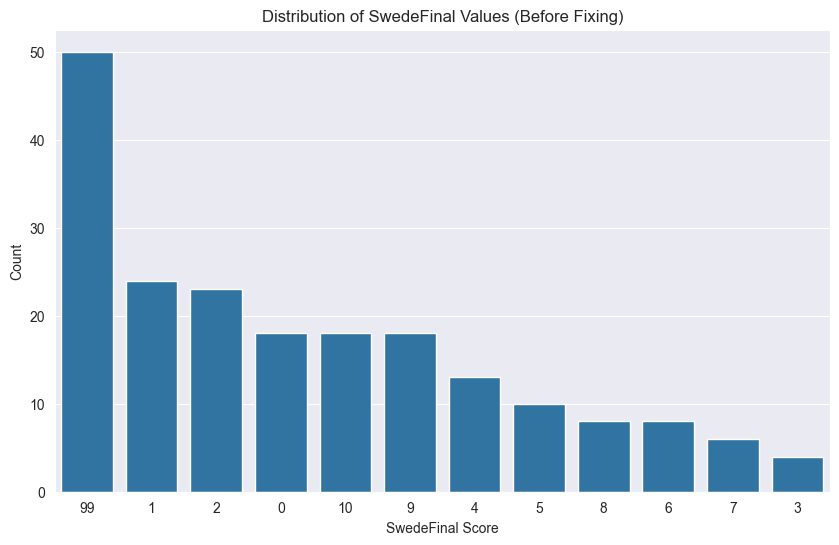

In [152]:
class_counts = metadata['SwedeFinal'].value_counts()
# Plot histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_metadata, x='SwedeFinal', order=class_counts.index)
plt.title('Distribution of SwedeFinal Values (Before Fixing)')
plt.xlabel('SwedeFinal Score')
plt.ylabel('Count')
plt.show()

In [153]:
# List of columns contributing to SwedeFinal score
score_columns = ['Aceto uptake', 'Margins', 'Vessels', 'Lesion size', 'Iodine uptake']

# Recalculate SwedeFinal for invalid entries
selected_metadata.loc[invalid_indices, 'SwedeFinal'] = selected_metadata.loc[invalid_indices, score_columns].sum(axis=1)

In [154]:
invalid_indices_after = selected_metadata[(selected_metadata['SwedeFinal'] < 0) | (selected_metadata['SwedeFinal'] > 10)].index
print(f"Number of invalid SwedeFinal entries after recalculation: {len(invalid_indices_after)}")

Number of invalid SwedeFinal entries after recalculation: 0


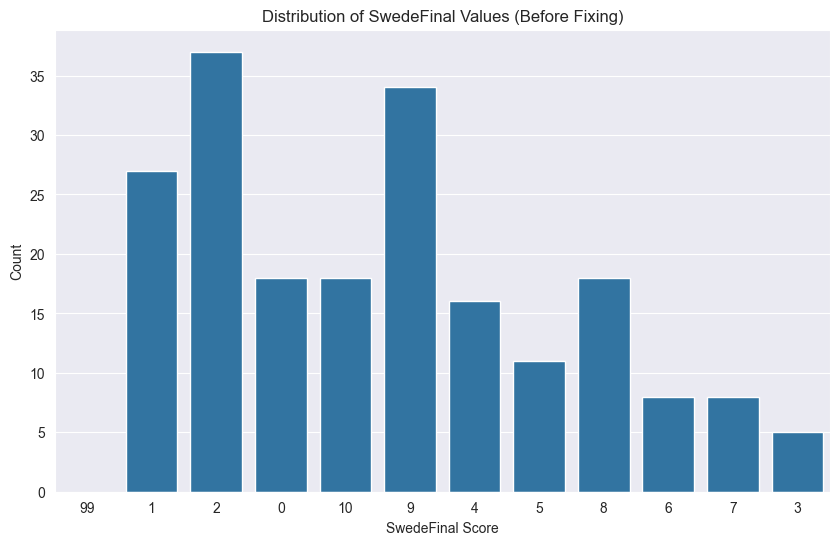

In [155]:
class_counts = metadata['SwedeFinal'].value_counts()
# Plot histogram
plt.figure(figsize=(10, 6))
sns.countplot(data=selected_metadata, x='SwedeFinal', order=class_counts.index)
plt.title('Distribution of SwedeFinal Values (Before Fixing)')
plt.xlabel('SwedeFinal Score')
plt.ylabel('Count')
plt.show()

In [156]:
# Save data frame for further usage.
selected_metadata.to_csv('./data/source.csv');